# HW_2

In [219]:
from pandas import read_csv

In [220]:
df = read_csv('2017_jun_final - 2017_jun_final.csv')
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [221]:
# Розмір таблиці
rows, columns = df.shape

print("Кількість рядків:", rows)
print("Кількість стовпців:", columns)

Кількість рядків: 8704
Кількість стовпців: 25


In [222]:
# Типи всіх стовпців
column_types = df.dtypes

print("Типи стовпців:")
print(column_types)

Типи стовпців:
N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary           

In [223]:
# Частка пропусків
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_ratio = (missing_values / total_values) * 100

print("Частка пропусків у кожній колонці:")
print(missing_ratio)

Частка пропусків у кожній колонці:
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000

In [224]:
# Видалення стовпців з пропусками, крім стовпця "Мова програмування"
target_column = 'Мова програмування'
columns_to_keep = [target_column]
columns_to_keep.extend(df.columns[df.notna().all()])
df = df[columns_to_keep]
print(f"Розмір даних після видалення рядків з пропусками, крім стовпця '{target_column}':", df.shape)

Розмір даних після видалення рядків з пропусками, крім стовпця 'Мова програмування': (8704, 20)


In [225]:
# Частка пропусків
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_ratio = (missing_values / total_values) * 100

print("Частка пропусків у кожній колонці:")
print(missing_ratio)

Частка пропусків у кожній колонці:
Мова програмування                  44.232537
N                                    0.000000
Посада                               0.000000
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [226]:
df = df.dropna()

print("Розмір даних після видалення рядків з пропусками:", df.shape)

Розмір даних після видалення рядків з пропусками: (4854, 20)


In [227]:
# Створення нової таблиці python_data
python_data = df[df[target_column] == 'Python']

print("Розмір нової таблиці python_data:", python_data.shape)

Розмір нової таблиці python_data: (207, 20)


In [228]:
# Групування за стовпцем "Посада"
grouped = python_data.groupby('Посада')

for position, data in grouped:
    print("Посада:", position)
    print(data.head())
    print("\n")

Посада: Junior Software Engineer
    Мова програмування    N                    Посада Загальний досвід роботи  \
87              Python   88  Junior Software Engineer                     0.5   
114             Python  115  Junior Software Engineer                     1.5   
143             Python  144  Junior Software Engineer                       1   
162             Python  163  Junior Software Engineer                     0.5   
171             Python  172  Junior Software Engineer                    0.25   

    Досвід роботи на поточному місці  Зарплата на місяць  \
87                               0.5                 600   
114                              0.5                 685   
143                                1                 750   
162                              0.5                 500   
171                             0.25                 800   

     Зміна зарплати за 12 місяців    Місто Розмір компанії   Тип компанії  \
87                              0     Київ

In [229]:
# Агрегація 
aggregated_data = python_data.groupby('Посада')['Зарплата на місяць'].agg(['min', 'max'])

print("Дані після агрегації:")
print(aggregated_data)

Дані після агрегації:
                           min   max
Посада                              
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


In [230]:
# Середнє значення заробітної плати
def fill_avg_salary(row):
    return row.mean()

aggregated_data['avg'] = aggregated_data.apply(fill_avg_salary, axis=1)
print(aggregated_data.head())

                           min   max     avg
Посада                                      
Junior Software Engineer   100  1250   675.0
Senior Software Engineer  1300  9200  5250.0
Software Engineer          500  5400  2950.0
System Architect          3000  5000  4000.0
Technical Lead            1425  6200  3812.5


In [231]:
# Описову статистика для нового стовпця "avg"
description = aggregated_data['avg'].describe()

print(description)

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [232]:
# Збереження
aggregated_data.to_csv('aggregated_data.csv', index=False)

print("Таблиця успішно збережена в CSV файл.")

Таблиця успішно збережена в CSV файл.


In [233]:
from matplotlib.pyplot import figure, barh, xlabel, xticks, ylabel, title, yticks, legend, show,text, plot, fill_between,tight_layout, grid
from seaborn import boxplot
from numpy import arange

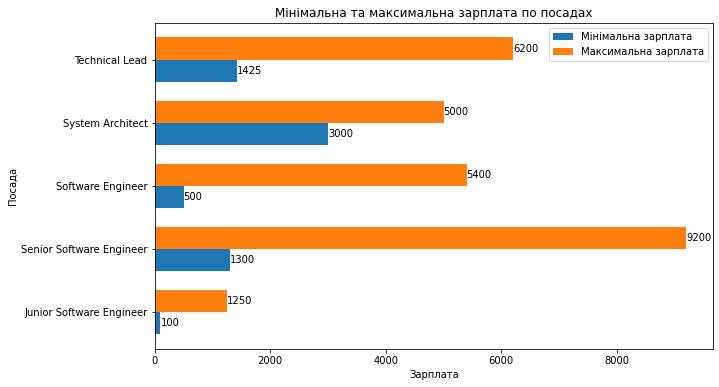

In [234]:
# Uрафік максимальних та мінімальних зарплат по посадах
positions = arange(len(aggregated_data))

bar_width = 0.35
figure(figsize=(10, 6))
bars_1 = barh(positions - bar_width/2, aggregated_data['min'], bar_width, label='Мінімальна зарплата')
bars_2 = barh(positions + bar_width/2, aggregated_data['max'], bar_width, label='Максимальна зарплата')


for bar in bars_1:
    text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='black')

for bar in bars_2:
    text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='black')

xlabel('Зарплата')
ylabel('Посада')
title('Мінімальна та максимальна зарплата по посадах')
yticks(positions, aggregated_data.index)
legend()
show()

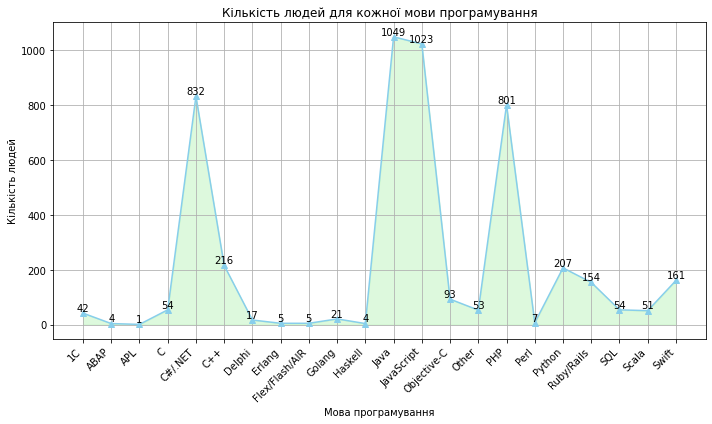

In [235]:
# Графік кількості людей для мов програмування
languages = df['Мова програмування'].value_counts().sort_index()

figure(figsize=(10, 6))
plot(languages.index, languages.values, marker='^', color='skyblue', linestyle='-')

fill_between(languages.index, languages.values, color='lightgreen', alpha=0.3)

for i, value in enumerate(languages.values):
    text(i, value, str(value), ha='center', va='bottom')

xlabel('Мова програмування')
ylabel('Кількість людей')
title('Кількість людей для кожної мови програмування')

xticks(rotation=45, ha='right')
tight_layout()
grid(True)
show()

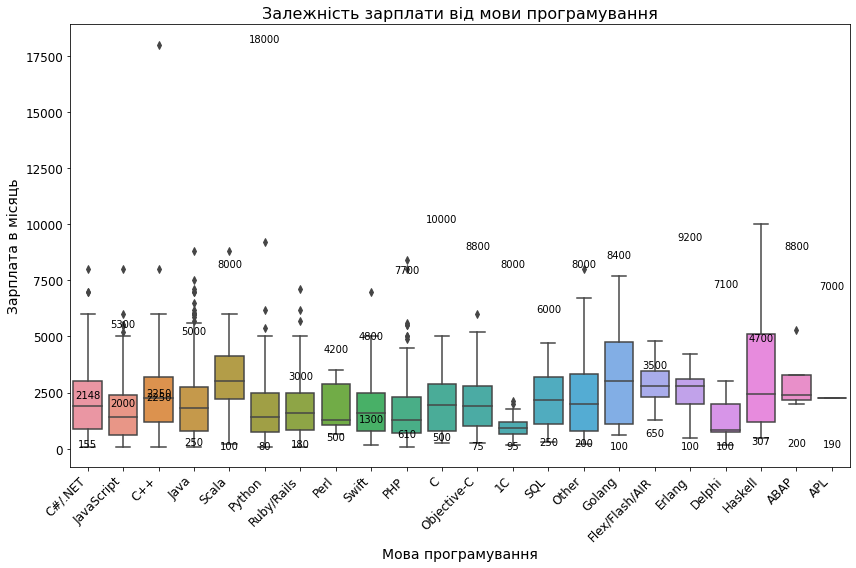

In [236]:
figure(figsize=(12, 8))
boxplot(x='Мова програмування', y='Зарплата на місяць', data=df)

for i in range(len(df['Мова програмування'].unique())):
    text(i, df.groupby('Мова програмування')['Зарплата на місяць'].max().iloc[i] + 100, 
             f"{df.groupby('Мова програмування')['Зарплата на місяць'].max().iloc[i]}", 
             ha='center', fontsize=10)
    text(i, df.groupby('Мова програмування')['Зарплата на місяць'].min().iloc[i] - 100, 
             f"{df.groupby('Мова програмування')['Зарплата на місяць'].min().iloc[i]}", 
             ha='center', fontsize=10)

xlabel('Мова програмування', fontsize=14)
ylabel('Зарплата в місяць', fontsize=14)
title('Залежність зарплати від мови програмування', fontsize=16)

xticks(rotation=45, ha='right', fontsize=12)
yticks(fontsize=12)
tight_layout()
show()